In [1]:
%load_ext rpy2.ipython
%R library(dplyr); library(ggplot2); library(gridExtra)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘gridExtra’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:dplyr’:

    combine


  res = super(Functio

array(['gridExtra', 'ggplot2', 'dplyr', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [195]:
import os
import os.path as op
from itertools import groupby

if op.exists("./synteny_panel_plots") == False:
    os.mkdir("./synteny_panel_plots")

In [81]:
group_names = ["group"+str(i) for i in range(1,19)]

In [86]:
group = "group1"
number = group.split("p")[-1]

with open("phage_by_group.txt") as prelim_groups:
    phage_grp = {}
    phages = []
    groups = []
    for line in prelim_groups:
        line = line.rstrip("\n")
        vec = line.split("\t")
        phage_grp[vec[0]] = vec[1]
        phages.append(vec[0])
        groups
    groups = list(phage_grp.values())
    phages = list(phage_grp.keys())

groups2 = ["group%s" % g.split(":")[-1] for g in groups]

unique=[]
for value in groups:
    if value not in unique:
        unique.append(value)

group1=[]
for value in phage_grp.keys():
    if phage_grp.get(value)=='CNSv2.0:%s' % number:
        group1.append(value)



In [74]:
from collections import Counter
Counter(groups2)

Counter({'group1': 62,
         'group10': 2,
         'group11': 9,
         'group12': 5,
         'group13': 3,
         'group14': 7,
         'group15': 21,
         'group16': 4,
         'group17': 10,
         'group18': 2,
         'group2': 8,
         'group3': 7,
         'group4': 44,
         'group5': 15,
         'group6': 35,
         'group7': 22,
         'group8': 14,
         'group9': 13,
         'groupNoGroup': 4})

In [58]:
if op.exists("./coverage_plots_pre/") == False:
    os.makedir("./coverage_plots_pre/")
    
for g in group_names:
    print(g)
    if op.exists("./coverage_plots_pre/%s" % g) == False:
        os.mkdir("./coverage_plots_pre/%s" % g)

group1
group2
group3
group4
group5
group6
group7
group8
group9
group10
group11
group12
group13
group14
group15
group16
group17
group18


In [75]:
%%R -i groups2 -i phages
plotnames <- c()
for (s in seq(1, length(groups))){
    group <- groups2[s]
    item <- phages[s]
    
    filename<-paste(group,"/",item,"step1.contig1.genomecoverage.txt",sep="")
    print(filename)
    coverage<-read.table(filename, sep="\t")
    #with(coverage, plot(V2, V3, type="l", col="aquamarine", cex=2))
    coverage %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="Raw Read Coverage", title=item)-> p

    outname = paste("./coverage_plots_pre/",group,"/",item,"png", sep="")
    print(outname)
    png(filename=outname, width=800, height=400, units="px")
    plot(p)
    dev.off()
    
    plotnames = c(plotnames, outname)
}

[1] "group6/1.206.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group6/1.206.O.png"
[1] "group4/1.237.B.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group4/1.237.B.png"
[1] "group4/1.267.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group4/1.267.O.png"
[1] "group8/1.015.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group8/1.015.O.png"
[1] "group7/1.100.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group7/1.100.O.png"
[1] "group6/1.239.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group6/1.239.O.png"
[1] "group4/1.196.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group4/1.196.O.png"
[1] "group6/1.134.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group6/1.134.O.png"
[1] "group13/2.117.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group13/2.117.O.png"
[1] "group1/1.278.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group1/1.278.O.png

In [35]:
%%R -i groups2 -i phages -w 800
plotnames = c()
for (item in group1[c(1,2)]){
    filename<-paste(group,"/",item,"step1.contig1.genomecoverage.txt",sep="")
    coverage<-read.table(filename, sep="\t")
    #with(coverage, plot(V2, V3, type="l", col="aquamarine", cex=2))
    coverage %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="Raw Read Coverage", title=item)-> p

    outname = paste("./coverage_plots_pre/",group,"/",item,"png", sep="")
    print(outname)
    png(filename=outname, width=800, height=400, units="px")
    plot(p)
    dev.off()
    
    plotnames = c(plotnames, outname)
}

[1] "./coverage_plots_pre/group1/1.278.O.png"
[1] "./coverage_plots_pre/group1/1.289.A.png"


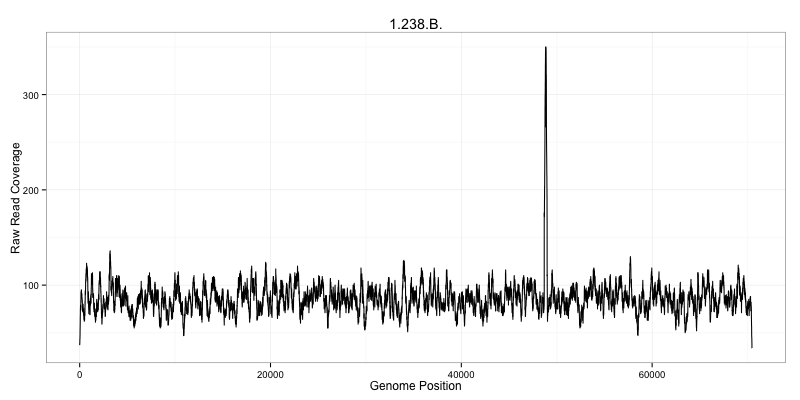

In [52]:
Image(plotnames[100])

In [53]:
plotnames[100]

'./coverage_plots_pre/group5/1.238.B.png'

In [ ]:
ls("./coverage_plots_pre/group1/")

In [87]:
phagepre = []
phage_reps = []


for p in phages:
    pre = ".".join(p.split(".")[0:2])
    if pre not in phagepre:
        phagepre.append(pre)
    else:
        phage_reps.append(pre)
        
repgroups = []

for r in phage_reps:
    for g in phage_grp.keys():
        if r in g:
            repgroups.append(phage_grp[g].split(":")[-1])
            break
            
print(len(phage_reps))
print(len(repgroups))
print(zip(repgroups, phage_reps))

34
34
[('6', '1.189'), ('5', '1.238'), ('4', '1.271'), ('15', '1.107'), ('4', '1.277'), ('10', '1.215'), ('6', '1.189'), ('9', '1.214'), ('1', '1.198'), ('1', '1.199'), ('15', '1.249'), ('9', '1.247'), ('4', '1.118'), ('9', '1.211'), ('4', '1.283'), ('9', '1.122'), ('4', '1.237'), ('4', '1.270'), ('6', '1.115'), ('5', '1.188'), ('11', '1.021'), ('8', '1.139'), ('17', '1.217'), ('4', '1.268'), ('4', '1.283'), ('6', '1.233'), ('17', '2.159'), ('1', '1.263'), ('5', '1.188'), ('1', '2.095'), ('11', '1.021'), ('15', '1.107'), ('8', '1.034'), ('18', '1.111')]


[1] "group5/1.238.A.step1.contig1.genomecoverage.txt"
[1] "coverage_plots_post/1.238.A.final.clc.genomecoverage"


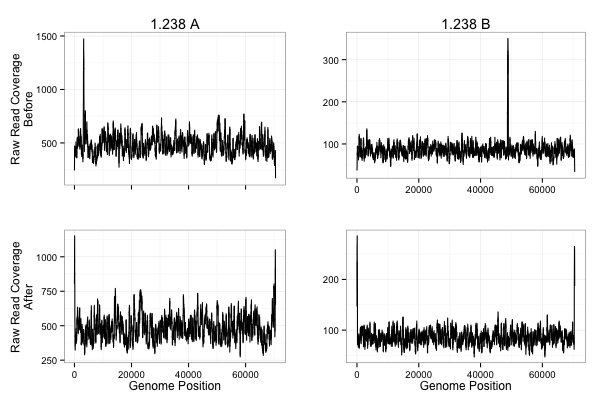

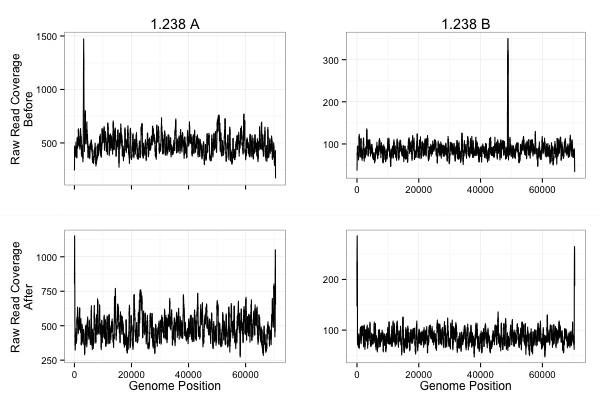

In [10]:
%%R -w 600 -h 400

group <- "group5"
item <- "1.238"
beforeA <- paste(group,"/",item,".A.","step1.contig1.genomecoverage.txt",sep="")
print(beforeA)
afterA <- paste("coverage_plots_post","/",item,".A.","final.clc.genomecoverage",sep="")
print(afterA)
beforeB <- paste(group,"/",item,".B.","step1.contig1.genomecoverage.txt",sep="")
afterB <- paste("coverage_plots_post","/",item,".B.","final.clc.genomecoverage",sep="")
bcA <- read.table(beforeA, sep="\t")
acA <- read.table(afterA, sep="\t")
bcB <- read.table(beforeB, sep="\t")
acB <- read.table(afterB, sep="\t")

bpA <- bcA %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + theme(axis.text.x = element_blank())+ labs(y="Raw Read Coverage\nBefore", 
                                                                    title=paste(item,"A"), x = "")-> p
bpB <- bcB %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(title=paste(item, "B"), y="", x="")-> p
apA <- acA %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="Raw Read Coverage\nAfter")-> p
apB <- acB %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="")-> p

final <- grid.arrange(bpA, bpB, apA, apB,
             ncol = 2, nrow = 2, widths = c(6, 6), heights = c(7,6))
plot(final)

In [115]:
op.exists("group5/1.238.A.step1.contig1.genomecoverage.txt")
op.exists("coverage_plots_post/1.238.A.final.clc.genomecoverage")
#os.mkdir("coverage_plots_post")

False

In [116]:
!scp jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/final_coverage/*genomecoverage ./coverage_plots_post/

1.003.O.final.clc.genomecoverage              100% 1841KB   1.8MB/s   00:00    
1.004.O.final.clc.genomecoverage              100% 1940KB   1.9MB/s   00:00    
1.005.O.final.clc.genomecoverage              100% 2296KB   2.2MB/s   00:00    
1.007.O.final.clc.genomecoverage              100% 2243KB   2.2MB/s   00:00    
1.008.O.final.clc.genomecoverage              100%  459KB 459.1KB/s   00:00    
1.009.O.final.clc.genomecoverage              100% 1999KB   2.0MB/s   00:00    
1.011.O.final.clc.genomecoverage              100%  474KB 474.1KB/s   00:00    
1.012.O.final.clc.genomecoverage              100% 2763KB   2.7MB/s   00:00    
1.013.O.final.clc.genomecoverage              100% 1994KB   2.0MB/s   00:00    
1.015.O.final.clc.genomecoverage              100% 1862KB   1.8MB/s   00:00    
1.016.O.final.clc.genomecoverage              100% 2202KB   2.2MB/s   00:00    
1.017.O.final.clc.genomecoverage              100% 2343KB   2.3MB/s   00:00    
1.020.O.final.clc.genomecoverage        

In [21]:
from __future__ import print_function

In [118]:
def compare_seqs(n1, n2):
    if n1 == n2:
        return 1
    else:
        return 0
    


In [48]:
maf1 = "./last_aln/1_238_before.maf"
query = "1.238.A"
subject = "1.238.B"
outtable = "./last_aln/1_238_before_dot.txt"

with open(outtable, "w") as oh:
    print(query, subject, "match", sep="\t", file=oh)
    ih = [i for i in open(maf1).readlines() if i.startswith("#")==False and len(i.split())>1]


    for i in range(0, len(ih), 3):
        scores = ih[i]
        aln1 = ih[i+1]
        #print(aln1.split()[0:3])
        aln2 = ih[i+2]
        #print(aln2.split()[0:3])

        start1 = int(aln1.split()[2])
        print(start1)
        strand1 = aln1.split()[4]
        seq1 = aln1.split()[-1]

        start2 = int(aln2.split()[2])
        print(start2)
        strand2 = aln2.split()[4]
        seq2 = aln2.split()[-1]
        for i, (n1, n2) in enumerate(zip(seq1, seq2)):
            start1 = advance_seq(start1, strand1)
            start2 = advance_seq(start2, strand2)
            print(start1, start2, compare_seqs(n1,n2), sep="\t", file=oh)


24872
0
0
45595
60372
35473
38827
56448


In [149]:
def read_fasta(file_handle):
    '''Fasta iterator'''
    for header, group in groupby(file_handle, lambda line: line[0] == '>'):
        if header:
            line = next(group)
            name = line[1:].strip()
        else:
            seq = ''.join(line.strip() for line in group)
            yield name, seq

def get_fasta_len(fasta):
    genome_len = 0
    with open(fasta) as ih:
        for name, seq in read_fasta(ih):
            genome_len += len(seq)
    return genome_len

def real_start(start, glen, strand):
    if strand == "+":
        rs = start + 1
    if strand == "-":
        rs = glen - (start+1)
    return rs

def advance_seq(location, strand):
    if strand == "+":
        location += 1
    elif strand == "-":
        location -= 1
    else:
        print("strand not designated!")
        raise IOError
    return location

def maf_to_tbl(maf, outfile, query, subject, query_fasta, subject_fasta):
    with open(outfile, "w") as oh:
        print(query, subject, "match", sep="\t", file=oh)
        ih = [i for i in open(maf).readlines() if i.startswith("#")==False and len(i.split())>1]
        qlen = get_fasta_len(query_fasta)
        slen = get_fasta_len(subject_fasta)
        for i in range(0, len(ih), 3):
            scores = ih[i]
            aln1 = ih[i+1]
            #print(aln1.split()[0:3])
            aln2 = ih[i+2]
            #print(aln2.split()[0:3])

            strand1 = aln1.split()[4]
            start1 = real_start(int(aln1.split()[2]), qlen, strand1)
            seq1 = aln1.split()[-1]

            strand2 = aln2.split()[4]
            start2 = real_start(int(aln2.split()[2]), slen, strand2)
            seq2 = aln2.split()[-1]
            for i, (n1, n2) in enumerate(zip(seq1, seq2)):
                start1 = advance_seq(start1, strand1)
                start2 = advance_seq(start2, strand2)
                print(start1, start2, compare_seqs(n1,n2), sep="\t", file=oh)
        for i in range(0, qlen):
            print(i,"NA", 0, sep="\t", file=oh)
        for i in range(0, slen):
            print("NA",i,0,sep="\t", file=oh)
    return outfile

In [150]:
out = maf_to_tbl("./last_aln/1_238_after.maf", 
                 "./last_aln/1.238_after_dot.txt", 
                 "1.238.A", "1.238.B", 
                 "./step1contig1/1.238.A.step1.contig1.fasta",
                "./step1contig1/1.238.B.step1.contig1.fasta")
!tail -n20 ./last_aln/1.238_after_dot.txt 

NA	70447	0
NA	70448	0
NA	70449	0
NA	70450	0
NA	70451	0
NA	70452	0
NA	70453	0
NA	70454	0
NA	70455	0
NA	70456	0
NA	70457	0
NA	70458	0
NA	70459	0
NA	70460	0
NA	70461	0
NA	70462	0
NA	70463	0
NA	70464	0
NA	70465	0
NA	70466	0


In [181]:
%%R
plot_synteny_before_after <- function(
before_tbl = "./last_aln/1_238_before_dot.txt",
after_tbl = "./last_aln/1.238_after_dot.txt",
sname = "1.238.B",
qname = "1.238.A") {

dott <- read.table(before_tbl, sep="\t", header=TRUE)
colnames(dott)[c(1,2)] = c("query", "subject")
smax1 = max(dott$subject)
qmax1 = max(dott$query)
dp1 <- ggplot(dott, aes(query, subject)) + geom_point(data = filter(dott, match==1), size=.5, aes(query, subject)) + theme_bw()
dp1 + labs(x=qname, y=sname, title="Synteny Plot") -> dp1
dott2 <- read.table(after_tbl, sep="\t", header=TRUE)
colnames(dott2)[c(1,2)] = c("query", "subject")
dp2 <- ggplot(dott2, aes(query, subject)) + geom_point(data = filter(dott2, match==1), size=.5, aes(query, subject)) + theme_bw()
dp2 + labs(x=qname, y=sname, title="Synteny Plot") -> dp2

return(c(dp1, dp2))
}
plots = plot_synteny_before_after()

plot_synteny <- function(tbl, sname, qname){
    dott <- read.table(tbl, sep="\t", header=TRUE)
    colnames(dott)[c(1,2)] = c("query", "subject")
    smax1 = max(dott$subject)
    qmax1 = max(dott$query)
    dp1 <- ggplot(dott, aes(query, subject)) + geom_point(data = filter(dott, match==1), size=.5, aes(query, subject)) + theme_bw()
    dp1 + labs(x=qname, y=sname) -> dp1
    return(dp1)
}

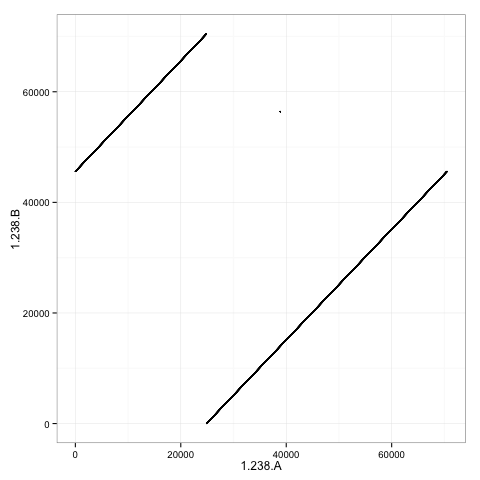

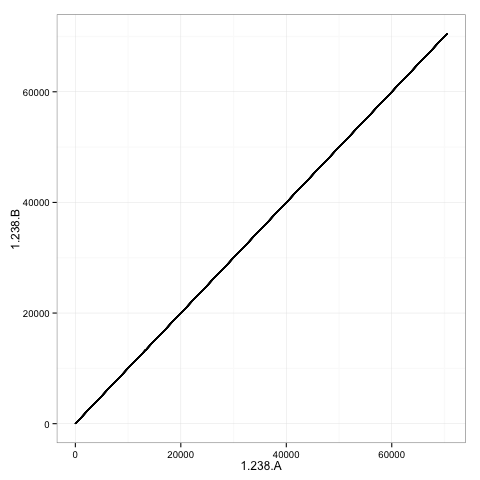

In [182]:
%%R
dp1 = plot_synteny("./last_aln/1_238_before_dot.txt", "1.238.B", "1.238.A")
dp2 = plot_synteny("./last_aln/1.238_after_dot.txt", "1.238.B", "1.238.A")
plot(dp1)
plot(dp2)

[1] "group5/1.238.A.step1.contig1.genomecoverage.txt"
[1] "coverage_plots_post/1.238.A.final.clc.genomecoverage"


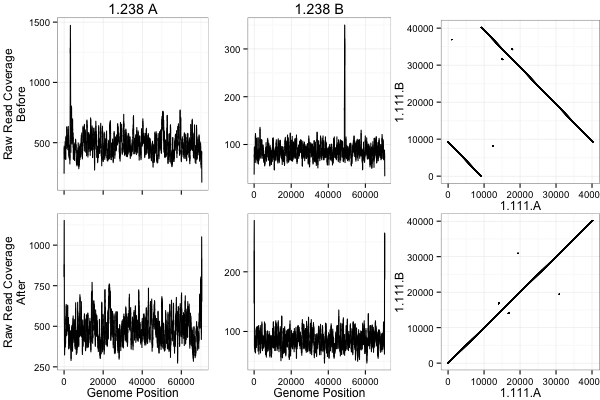

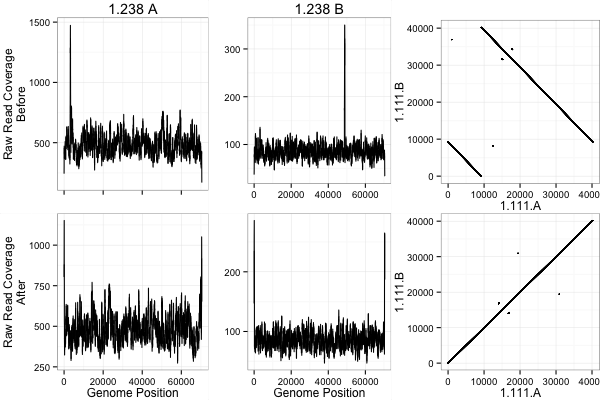

In [206]:
%%R -w 600 -h 400

group <- "group5"
item <- "1.238"
beforeA <- paste(group,"/",item,".A.","step1.contig1.genomecoverage.txt",sep="")
print(beforeA)
afterA <- paste("coverage_plots_post","/",item,".A.","final.clc.genomecoverage",sep="")
print(afterA)
beforeB <- paste(group,"/",item,".B.","step1.contig1.genomecoverage.txt",sep="")
afterB <- paste("coverage_plots_post","/",item,".B.","final.clc.genomecoverage",sep="")
bcA <- read.table(beforeA, sep="\t")
acA <- read.table(afterA, sep="\t")
bcB <- read.table(beforeB, sep="\t")
acB <- read.table(afterB, sep="\t")

bpA <- bcA %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + theme(axis.text.x = element_blank())+ labs(y="Raw Read Coverage\nBefore", 
                                                                    title=paste(item,"A"), x = "") + theme(plot.margin=grid::unit(c(0,0,0,0), "pt"))
bpB <- bcB %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(title=paste(item, "B"), y="", x="")
bpB <- bpB + theme(plot.margin=grid::unit(c(0,0,0,0), "pt"))
apA <- acA %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="Raw Read Coverage\nAfter") + theme(plot.margin=grid::unit(c(0,0,0,0), "pt"))
apB <- acB %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="") + theme(plot.margin=grid::unit(c(0,0,0,0), "pt"))
dp1 <- dp1 + theme(plot.margin=grid::unit(c(20,0,0,0), "pt"))
dp2 <- dp2 + theme(plot.margin=grid::unit(c(0,0,0,0), "pt"))


final <- grid.arrange(bpA, bpB, dp1, apA, apB, dp2,
             ncol = 3, nrow = 2, widths = c(8, 7, 8), heights = c(8,7))
plot(final)

## how to run last:
```
lastdb 1_238_before ../step1contig1/1.238.A.step1.contig1.fasta 
lastal 1_238_before ../step1contig1/1.238.B.step1.contig1.fasta > 1_238_before.maf

lastdb 1_238_after ../final_fastas_bp/1.238.A.final.fasta
lastal 1_238_after ../final_fastas_bp/1.238.B.final.fasta > 1_238_after.maf
```

In [88]:
print(zip(repgroups, phage_reps))

[('6', '1.189'), ('5', '1.238'), ('4', '1.271'), ('15', '1.107'), ('4', '1.277'), ('10', '1.215'), ('6', '1.189'), ('9', '1.214'), ('1', '1.198'), ('1', '1.199'), ('15', '1.249'), ('9', '1.247'), ('4', '1.118'), ('9', '1.211'), ('4', '1.283'), ('9', '1.122'), ('4', '1.237'), ('4', '1.270'), ('6', '1.115'), ('5', '1.188'), ('11', '1.021'), ('8', '1.139'), ('17', '1.217'), ('4', '1.268'), ('4', '1.283'), ('6', '1.233'), ('17', '2.159'), ('1', '1.263'), ('5', '1.188'), ('1', '2.095'), ('11', '1.021'), ('15', '1.107'), ('8', '1.034'), ('18', '1.111')]


In [170]:
!lastdb 1_189_before ./step1contig1/1.189.B.step1.contig1.fasta
!lastal 1_189_before ./step1contig1/1.189.C.step1.contig1.fasta > 1_189_BC_before.maf

!lastdb 1_189_after ./final_fastas_bp/1.189.B.final.fasta
!lastal 1_189_after ./final_fastas_bp/1.189.C.final.fasta > 1_189_BC_after.maf
!head 1_189_BC_after.maf

# LAST version 752
#
# a=7 b=1 A=7 B=1 e=22 d=14 x=21 y=9 z=21 D=1e+06 E=1.35667e+07
# R=10 u=0 s=2 S=0 M=0 T=0 m=10 l=1 n=10 k=1 w=1000 t=0.910239 j=3 Q=0
# 1_189_after
# Reference sequences=1 normal letters=36855
# lambda=1.09602 K=0.335388
#
#    A  C  G  T
# A  1 -1 -1 -1


In [171]:
maf_to_tbl("1_189_BC_before.maf", "./last_aln/1_189_BC_before_dottbl.txt", "1.189.B", "1.189.C", "./step1contig1/1.189.B.step1.contig1.fasta", "./step1contig1/1.189.C.step1.contig1.fasta") 
maf_to_tbl("1_189_BC_after.maf", "./last_aln/1_189_BC_after_dottbl.txt", "1.189.B", "1.189.C", "./final_fastas_bp/1.189.B.final.fasta", "./final_fastas_bp/1.189.C.final.fasta")

'./last_aln/1_189_BC_after_dottbl.txt'

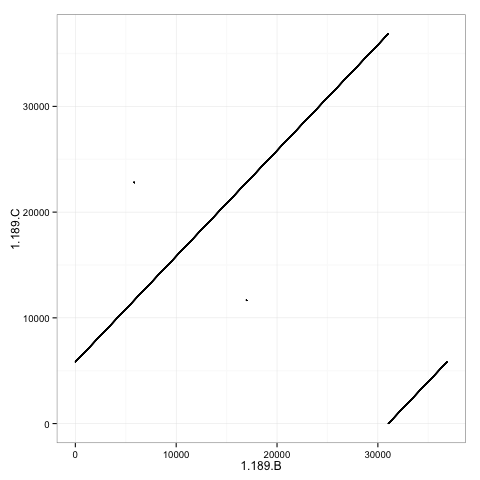

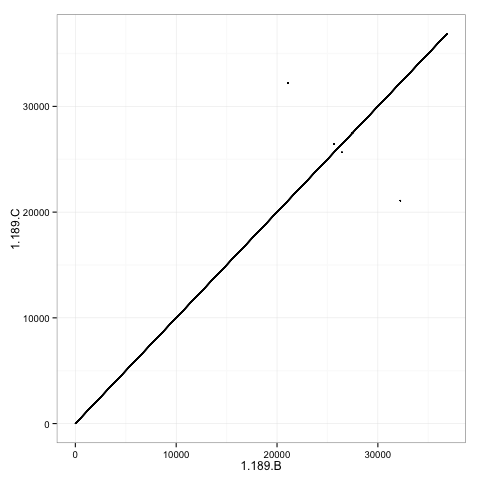

In [184]:
%%R
dp1 = plot_synteny("./last_aln/1_189_BC_before_dottbl.txt", "1.189.C", "1.189.B")
dp2 = plot_synteny("./last_aln/1_189_BC_after_dottbl.txt", "1.189.C", "1.189.B")
plot(dp1)
plot(dp2)

[1] "group6/1.189.B.step1.contig1.genomecoverage.txt"
[1] "coverage_plots_post/1.189.B.final.clc.genomecoverage"


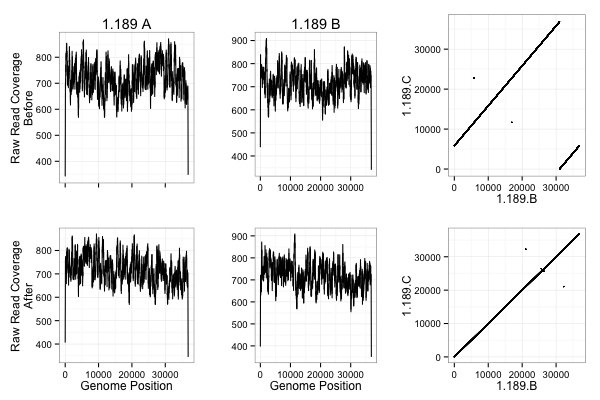

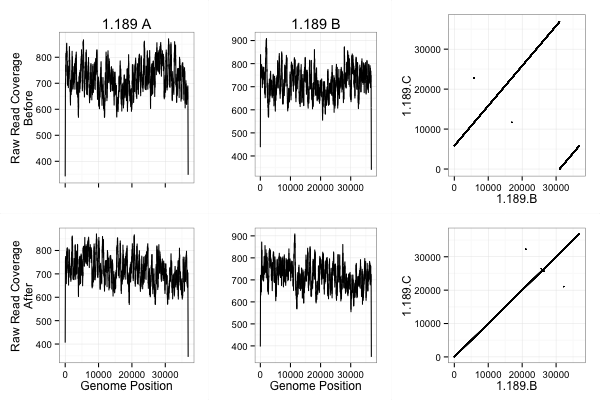

In [185]:
%%R -w 600 -h 400

group <- "group6"
item <- "1.189"
beforeA <- paste(group,"/",item,".B.","step1.contig1.genomecoverage.txt",sep="")
print(beforeA)
afterA <- paste("coverage_plots_post","/",item,".B.","final.clc.genomecoverage",sep="")
print(afterA)
beforeB <- paste(group,"/",item,".C.","step1.contig1.genomecoverage.txt",sep="")
afterB <- paste("coverage_plots_post","/",item,".C.","final.clc.genomecoverage",sep="")
bcA <- read.table(beforeA, sep="\t")
acA <- read.table(afterA, sep="\t")
bcB <- read.table(beforeB, sep="\t")
acB <- read.table(afterB, sep="\t")

bpA <- bcA %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + theme(axis.text.x = element_blank())+ labs(y="Raw Read Coverage\nBefore", 
                                                                    title=paste(item,"A"), x = "")-> p
bpB <- bcB %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(title=paste(item, "B"), y="", x="")-> p
apA <- acA %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="Raw Read Coverage\nAfter")-> p
apB <- acB %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="")-> p

final <- grid.arrange(bpA, bpB, dp1, apA, apB, dp2,
             ncol = 3, nrow = 2, widths = c(8, 7, 8), heights = c(8,7))
plot(final)

png(file=)

In [209]:
# '17', '2.159'
!lastdb 2_159_before ./step1contig1/2.159.A.step1.contig1.fasta
!lastal 2_159_before ./step1contig1/2.159.B.step1.contig1.fasta > 2_159_before.maf

!lastdb 2_159_after ./final_fastas_bp/2.159.A.final.fasta
!lastal 2_159_after ./final_fastas_bp/2.159.B.final.fasta > 2_159_after.maf

In [178]:
maf_to_tbl("2_159_before.maf", "./last_aln/2_159_before_dottbl.txt", "2.159.A", "2.159.B",
          "step1contig1/2.159.A.step1.contig1.fasta", "step1contig1/2.159.B.step1.contig1.fasta")
maf_to_tbl("2_159_after.maf", "./last_aln/2_159_after_dottbl.txt", "2.159.A", "2.159.B",
          "final_fastas_bp/2.159.A.final.fasta", "final_fastas_bp/2.159.B.final.fasta")

'./last_aln/2_159_after_dottbl.txt'

In [186]:
%%R
dp1 <- plot_synteny("./last_aln/2_159_before_dottbl.txt", "2.159.B", "2.159.A")
dp2 <- plot_synteny("./last_aln/2_159_after_dottbl.txt", "2.159.B", "2.159.A")

[1] "group17/2.159.A.step1.contig1.genomecoverage.txt"
[1] "coverage_plots_post/2.159.A.final.clc.genomecoverage"


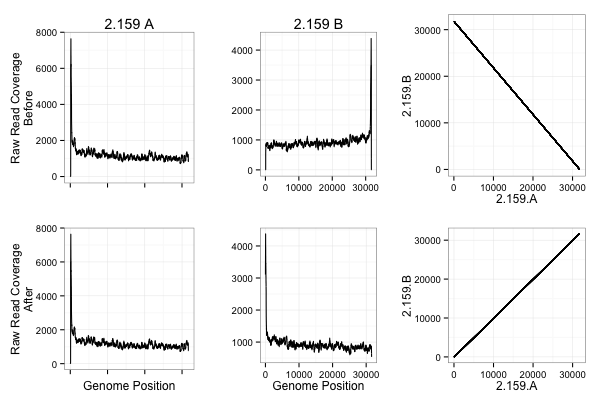

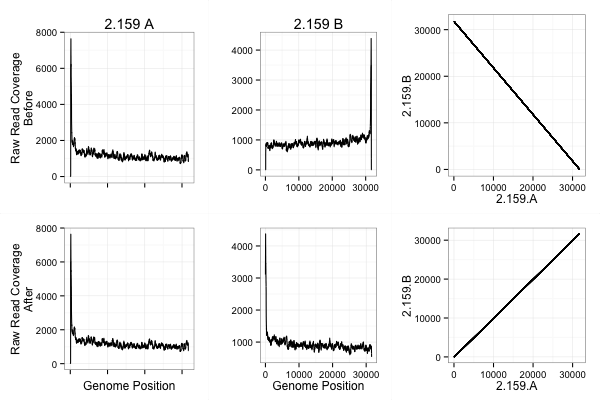

In [187]:
%%R -w 600 -h 400

group <- "group17"
item <- "2.159"
beforeA <- paste(group,"/",item,".A.","step1.contig1.genomecoverage.txt",sep="")
print(beforeA)
afterA <- paste("coverage_plots_post","/",item,".A.","final.clc.genomecoverage",sep="")
print(afterA)
beforeB <- paste(group,"/",item,".B.","step1.contig1.genomecoverage.txt",sep="")
afterB <- paste("coverage_plots_post","/",item,".B.","final.clc.genomecoverage",sep="")
bcA <- read.table(beforeA, sep="\t")
acA <- read.table(afterA, sep="\t")
bcB <- read.table(beforeB, sep="\t")
acB <- read.table(afterB, sep="\t")

bpA <- bcA %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + theme(axis.text.x = element_blank())+ labs(y="Raw Read Coverage\nBefore", 
                                                                    title=paste(item,"A"), x = "")-> p
bpB <- bcB %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(title=paste(item, "B"), y="", x="")-> p
apA <- acA %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + theme(axis.text.x = element_blank()) + labs(x="Genome Position", 
                                                                                                           y="Raw Read Coverage\nAfter")-> p
apB <- acB %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="")-> p

final <- grid.arrange(bpA, bpB, dp1, apA, apB, dp2,
             ncol = 3, nrow = 2, widths = c(8, 7, 8), heights = c(8,7))
plot(final)

In [190]:
# '18', '1.111'
import subprocess
name = "1.111"
sub = "B"
query = "A"
before = "./last_aln/{name}_before.maf".format(name=name)
after = "./last_aln/{name}_after.maf".format(name=name)
before_qfasta = "./step1contig1/{name}.{query}.step1.contig1.fasta".format(**locals())
before_sfasta = "./step1contig1/{name}.{sub}.step1.contig1.fasta".format(**locals())
final_qfasta = "./final_fastas_bp/{name}.{query}.final.fasta".format(**locals())
final_sfasta = "./final_fastas_bp/{name}.{sub}.final.fasta".format(**locals())

cmd1 = "lastdb {name}_before {before_qfasta}".format(**locals())
cmd2 = "lastal {name}_before {before_sfasta} > {before}".format(**locals())

cmd3 = "lastdb {name}_after {final_qfasta}".format(**locals())
cmd4 = "lastal {name}_after {final_sfasta} > {after}".format(**locals())

subprocess.call(cmd1, shell=True)
subprocess.call(cmd2, shell=True)
subprocess.call(cmd3, shell=True)
subprocess.call(cmd4, shell=True)


'\nsubprocess.call(cmd1, shell=True)\nsubprocess.call(cmd2, shell=True)\nsubprocess.call(cmd3, shell=True)\nsubprocess.call(cmd4, shell=True)\n'

In [192]:
maf_to_tbl(before, "./last_aln/{name}_before_dottbl.txt".format(name=name), 
           "%s.%s" % (name, query), "%s.%s" % (name, subject), before_qfasta, before_sfasta)
maf_to_tbl(after, "./last_aln/{name}_after_dottbl.txt".format(name=name), "%s.%s" % (name, query), 
           "%s.%s" % (name, subject), 
           final_qfasta, final_sfasta)

'./last_aln/1.111_after_dottbl.txt'

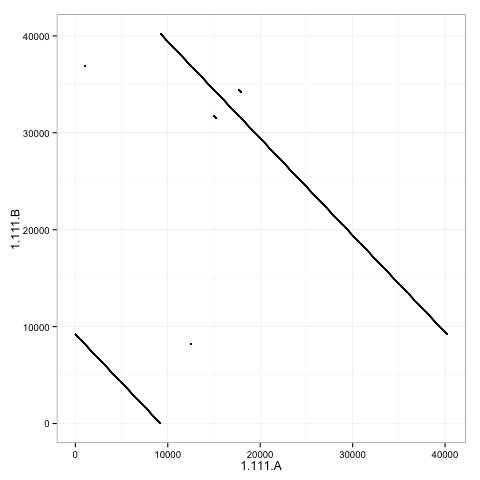

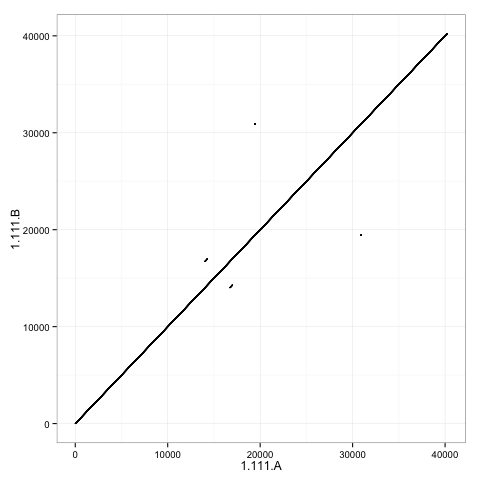

In [193]:
%%R
dp1 = plot_synteny("last_aln/1.111_before_dottbl.txt", "1.111.B", "1.111.A")
dp2 = plot_synteny("last_aln/1.111_after_dottbl.txt",  "1.111.B", "1.111.A")

plot(dp1)
plot(dp2)

[1] "group18/1.111.A.step1.contig1.genomecoverage.txt"
[1] "coverage_plots_post/1.111.A.final.clc.genomecoverage"


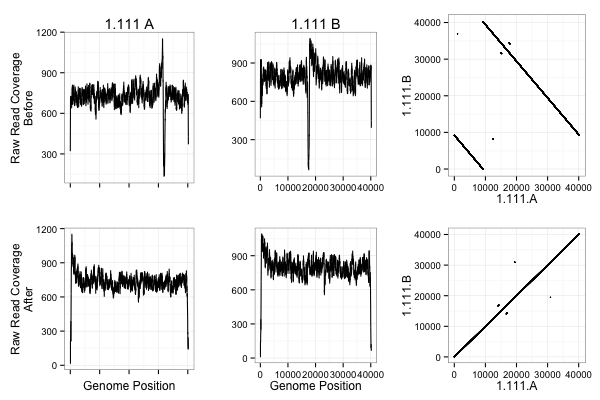

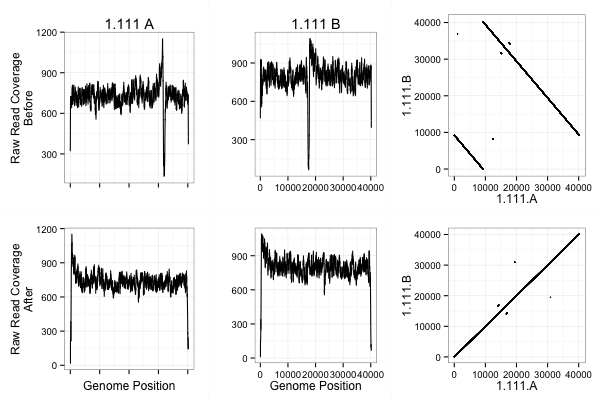

In [194]:
%%R -w 600 -h 400 -i sub -i query -i name

item <- name
beforeA <- paste("step1.contig1/cov/",item,".",query,".step1.contig1.genomecoverage.txt",sep="")
print(beforeA)
afterA <- paste("coverage_plots_post","/",item,".",query,".final.clc.genomecoverage",sep="")
print(afterA)
beforeB <- paste(group,"/",item,".", sub,".step1.contig1.genomecoverage.txt",sep="")
afterB <- paste("coverage_plots_post","/",item,".",sub,".final.clc.genomecoverage",sep="")
bcA <- read.table(beforeA, sep="\t")
acA <- read.table(afterA, sep="\t")
bcB <- read.table(beforeB, sep="\t")
acB <- read.table(afterB, sep="\t")

bpA <- bcA %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + theme(axis.text.x = element_blank())+ labs(y="Raw Read Coverage\nBefore", 
                                                                    title=paste(item,"A"), x = "")-> p
bpB <- bcB %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(title=paste(item, "B"), y="", x="")-> p
apA <- acA %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + theme(axis.text.x = element_blank()) + labs(x="Genome Position", 
                                                                                                           y="Raw Read Coverage\nAfter")-> p
apB <- acB %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="")-> p

final <- grid.arrange(bpA, bpB, dp1, apA, apB, dp2,
             ncol = 3, nrow = 2, widths = c(8, 7, 8), heights = c(8,7))
plot(final)